In [1]:
#%matplotlib widget
import os
import numpy as np
from pathlib import Path
from pzflow.examples import get_galaxy_data
import tables_io
import pandas as pd
import h5py
from matplotlib import pyplot as plt

In [2]:
path_to_star = '/users/irenemoskowitz/DESC/STAR_Challenge'

# Load in Buzzard data

In [3]:
#buzzard_filepath = '/users/irenemoskowitz/DESC/tomo_challenge/data_buzzard/validation.hdf5'
#buzzard_filepath = 'augmentation_paper_plots/catalogs/buzzard_shifted_mags_and_nmads.hdf5'
buzzard_filepath = 'augmentation_paper_plots/catalogs/magshifted_flowed_catalog.hdf5'

In [4]:
buzzard_data = tables_io.read(buzzard_filepath)
buzzard_data = pd.DataFrame(buzzard_data['photometry'])
buzzard_data

,eg,egr,ei,eiz,er,eri,eu,eug,ey,ez,...,i,iz,r,ri,specz,u,ug,y,z,zy
0,0.130233,0.174793,0.052735,0.070614,0.116585,0.127957,0.279619,0.308459,0.088400,0.046961,...,25.337305,0.760064,26.592627,1.255322,0.867955,26.076359,-0.918268,24.299738,24.577242,0.277505
1,0.070575,0.076379,0.017601,0.027737,0.029207,0.034101,0.245181,0.255136,0.044252,0.021437,...,24.058702,0.320415,25.137892,1.079190,0.793092,25.971682,-0.181257,23.629154,23.738287,0.109133
2,0.063425,0.073513,0.028262,0.058793,0.037168,0.046693,0.897175,0.899414,0.109739,0.051554,...,24.644035,-0.084380,25.383162,0.739126,0.737080,27.320820,1.276435,24.476376,24.728415,0.252039
3,0.010316,0.013033,0.007461,0.012732,0.007965,0.010913,0.033885,0.035421,0.023284,0.010317,...,22.849552,0.082778,23.433218,0.583667,0.807872,24.026171,0.199299,22.815762,22.766773,-0.048988
4,0.013174,0.016668,0.010818,0.020646,0.010211,0.014877,0.073678,0.074847,0.054370,0.017585,...,23.465757,-0.016554,23.813637,0.347879,0.394589,24.879955,0.724361,23.973024,23.482311,-0.490713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999894,0.064495,0.088191,0.073156,0.146532,0.060151,0.094709,0.212212,0.221796,0.421440,0.126964,...,25.559334,-0.283485,26.125299,0.565966,0.273966,26.351322,0.294782,25.944551,25.842819,-0.101731
999895,0.043161,0.053510,0.022784,0.035670,0.031630,0.038982,0.185145,0.190109,0.029823,0.027445,...,24.391462,0.444732,25.205549,0.814088,0.585277,25.934708,0.370443,23.128351,23.946730,0.818379
999896,0.125383,0.139027,0.046217,0.078683,0.060064,0.075787,0.426645,0.444687,0.093470,0.063679,...,25.285122,0.385664,26.010284,0.725162,0.533783,27.664589,0.946484,24.368526,24.899458,0.530931
999897,0.069018,0.083656,0.037600,0.057321,0.047274,0.060404,0.180143,0.192912,0.110106,0.043266,...,24.907513,0.497561,25.777431,0.869919,0.827968,25.785055,-0.212360,24.887962,24.409950,-0.478011


In [5]:
np.argwhere(np.isnan(buzzard_data['specz'].to_numpy())).shape

(0, 1)

In [6]:
buzzard_data.replace(np.inf, 30, inplace=True)

In [7]:
i_band_mask = (buzzard_data['i'] < 26)
buzzard_data = buzzard_data[i_band_mask]

## Formatting for unshifted catalog

In [6]:
bands = ['u', 'g', 'r', 'i', 'z', 'y']
rename_dict = {}
for band in bands:
    rename_dict[f'{band}_mag'] = band
    rename_dict[f'{band}_mag_err'] = 'e'+band
rename_dict['redshift_true'] = 'specz'
rename_dict['mcal_T'] = 'size'

buzzard_data = buzzard_data.rename(columns=rename_dict)
buzzard_data

,dec,g,eg,i,ei,size,mcal_s2n,r,er,ra,specz,u,eu,y,ey,z,ez
0,7.421403,23.538255,0.011773,21.769382,0.004830,0.576045,316.817378,22.624446,0.007572,52.431239,0.675341,24.265597,0.054568,21.265647,0.011582,21.485489,0.006345
1,15.138728,25.235812,0.056221,24.159882,0.043668,0.562278,41.711503,24.393432,0.038617,46.422236,0.353149,30.000000,0.272251,23.916484,0.133076,23.918682,0.059661
2,13.779837,24.796307,0.037506,23.681077,0.028096,0.140247,58.158017,24.357185,0.037349,50.447088,0.912532,25.033294,0.110666,23.152559,0.065846,23.295431,0.033604
3,2.789819,22.035980,0.002951,19.701627,0.000719,0.319817,2213.294443,20.479865,0.001050,45.314482,0.459211,24.196266,0.051192,19.127597,0.001616,19.330385,0.000872
4,17.834595,25.747170,0.090042,24.598452,0.065402,0.111024,27.317942,24.862776,0.059500,45.712488,0.432662,30.000000,0.422132,24.254201,0.181630,24.395095,0.092525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10817977,11.513430,25.891299,0.102825,24.359327,0.052473,0.120507,29.031087,25.137735,0.076648,48.756321,0.732042,30.000000,0.419141,24.024746,0.147030,24.155680,0.074215
10817978,6.225114,26.836472,0.245565,25.329204,0.128200,0.209286,12.170349,25.984367,0.167169,52.015355,0.624942,30.000000,0.750545,30.000000,0.351653,25.151082,0.185632
10817979,7.409058,23.888778,0.016259,22.710728,0.011495,0.418694,154.611287,22.968764,0.010397,49.889367,0.428085,24.541729,0.070370,22.333070,0.030955,22.555701,0.017002
10817980,13.222501,24.951996,0.043289,23.910620,0.034710,0.474972,52.149499,24.161574,0.031192,46.683157,0.324251,25.736895,0.211571,23.635266,0.102710,23.663944,0.047184


## Formatting for shifted colors

In [7]:
zy_shifted = buzzard_data['z_shifted'] - buzzard_data['y_shifted']
buzzard_data['zy_shifted'] = zy_shifted
buzzard_data

,eg,egr,ei,eiz,er,eri,eu,eug,ey,ez,...,u,u_shifted,ug,ug_shifted,y,y_shifted,z,z_shifted,zy,zy_shifted
0,0.011773,0.013997,0.004830,0.007974,0.007572,0.008981,0.054568,0.055823,0.011582,0.006345,...,23.511488,22.357430,0.148433,-0.850170,21.265647,21.141745,21.485489,21.437709,0.219841,0.295964
1,0.056221,0.068207,0.043668,0.073935,0.038617,0.058294,0.272251,0.277995,0.133076,0.059661,...,29.245891,28.091833,4.185279,3.186675,23.916484,23.792582,23.918682,23.870903,0.002198,0.078321
2,0.037506,0.052931,0.028096,0.043802,0.037349,0.046737,0.110666,0.116849,0.065846,0.033604,...,24.279185,23.125126,-0.341923,-1.340526,23.152559,23.028657,23.295431,23.247652,0.142872,0.218995
3,0.002951,0.003132,0.000719,0.001130,0.001050,0.001273,0.051192,0.051277,0.001616,0.000872,...,23.442158,22.288099,1.581376,0.582773,19.127597,19.003695,19.330385,19.282606,0.202788,0.278910
4,0.090042,0.107925,0.065402,0.113306,0.059500,0.088417,0.422132,0.431628,0.181630,0.092525,...,29.245891,28.091833,3.673920,2.675317,24.254201,24.130299,24.395095,24.347316,0.140894,0.217016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10817977,0.102825,0.128249,0.052473,0.090892,0.076648,0.092889,0.419141,0.431570,0.147030,0.074215,...,29.245891,28.091833,3.529792,2.531188,24.024746,23.900844,24.155680,24.107900,0.130934,0.207057
10817978,0.245565,0.297065,0.128200,0.225598,0.167169,0.210667,0.750545,0.789696,0.351653,0.185632,...,29.245891,28.091833,2.584619,1.586016,30.000000,29.876098,25.151082,25.103303,-4.848918,-4.772795
10817979,0.016259,0.019299,0.011495,0.020523,0.010397,0.015499,0.070370,0.072224,0.030955,0.017002,...,23.787620,22.633561,0.074041,-0.924562,22.333070,22.209168,22.555701,22.507922,0.222631,0.298754
10817980,0.043289,0.053356,0.034710,0.058576,0.031192,0.046666,0.211571,0.215954,0.102710,0.047184,...,24.982786,23.828728,0.205989,-0.792614,23.635266,23.511364,23.663944,23.616164,0.028678,0.104801


In [8]:
bands = ['u', 'g', 'r', 'z', 'y']
colors = ['ug', 'gr', 'ri', 'iz', 'zy']

headers = ['specz', 'i']
rename_dict = {}
for band in bands:
    headers.append(f'{band}_shifted')
    headers.append(f'e{band}')
    rename_dict[f'{band}_shifted'] = band

for color in colors:
    headers.append(f'{color}_shifted')
    headers.append(f'e{color}')
    rename_dict[f'{color}_shifted'] = color

In [9]:
buzzard_data = buzzard_data[headers]
buzzard_data

,specz,i,u_shifted,eu,g_shifted,eg,r_shifted,er,z_shifted,ez,...,ug_shifted,eug,gr_shifted,egr,ri_shifted,eri,iz_shifted,eiz,zy_shifted,ezy
0,0.675341,21.769382,22.357430,0.054568,23.207600,0.011773,22.662071,0.007572,21.437709,0.006345,...,-0.850170,0.055823,0.545529,0.013997,0.892690,0.008981,0.331672,0.007974,0.295964,0.013206
1,0.353149,24.159882,28.091833,0.272251,24.905157,0.056221,24.431057,0.038617,23.870903,0.059661,...,3.186675,0.277995,0.474100,0.068207,0.271176,0.058294,0.288979,0.073935,0.078321,0.145838
2,0.912532,23.681077,23.125126,0.110666,24.465653,0.037506,24.394810,0.037349,23.247652,0.033604,...,-1.340526,0.116849,0.070843,0.052931,0.713734,0.046737,0.433425,0.043802,0.218995,0.073925
3,0.459211,19.701627,22.288099,0.051192,21.705326,0.002951,20.517490,0.001050,19.282606,0.000872,...,0.582773,0.051277,1.187836,0.003132,0.815863,0.001273,0.419021,0.001130,0.278910,0.001836
4,0.432662,24.598452,28.091833,0.422132,25.416516,0.090042,24.900401,0.059500,24.347316,0.092525,...,2.675317,0.431628,0.516115,0.107925,0.301949,0.088417,0.251136,0.113306,0.217016,0.203839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10817977,0.732042,24.359327,28.091833,0.419141,25.560644,0.102825,25.175360,0.076648,24.107900,0.074215,...,2.531188,0.431570,0.385284,0.128249,0.816033,0.092889,0.251427,0.090892,0.207057,0.164699
10817978,0.624942,25.329204,28.091833,0.750545,26.505817,0.245565,26.021992,0.167169,25.103303,0.185632,...,1.586016,0.789696,0.483825,0.297065,0.692789,0.210667,0.225901,0.225598,-4.772795,0.397642
10817979,0.428085,22.710728,22.633561,0.070370,23.558123,0.016259,23.006389,0.010397,22.507922,0.017002,...,-0.924562,0.072224,0.551734,0.019299,0.295661,0.015499,0.202806,0.020523,0.298754,0.035317
10817980,0.324251,23.910620,23.828728,0.211571,24.621342,0.043289,24.199199,0.031192,23.616164,0.047184,...,-0.792614,0.215954,0.422142,0.053356,0.288579,0.046666,0.294456,0.058576,0.104801,0.113030


In [10]:
buzzard_data = buzzard_data.rename(columns=rename_dict)
buzzard_data

,specz,i,u,eu,g,eg,r,er,z,ez,...,ug,eug,gr,egr,ri,eri,iz,eiz,zy,ezy
0,0.675341,21.769382,22.357430,0.054568,23.207600,0.011773,22.662071,0.007572,21.437709,0.006345,...,-0.850170,0.055823,0.545529,0.013997,0.892690,0.008981,0.331672,0.007974,0.295964,0.013206
1,0.353149,24.159882,28.091833,0.272251,24.905157,0.056221,24.431057,0.038617,23.870903,0.059661,...,3.186675,0.277995,0.474100,0.068207,0.271176,0.058294,0.288979,0.073935,0.078321,0.145838
2,0.912532,23.681077,23.125126,0.110666,24.465653,0.037506,24.394810,0.037349,23.247652,0.033604,...,-1.340526,0.116849,0.070843,0.052931,0.713734,0.046737,0.433425,0.043802,0.218995,0.073925
3,0.459211,19.701627,22.288099,0.051192,21.705326,0.002951,20.517490,0.001050,19.282606,0.000872,...,0.582773,0.051277,1.187836,0.003132,0.815863,0.001273,0.419021,0.001130,0.278910,0.001836
4,0.432662,24.598452,28.091833,0.422132,25.416516,0.090042,24.900401,0.059500,24.347316,0.092525,...,2.675317,0.431628,0.516115,0.107925,0.301949,0.088417,0.251136,0.113306,0.217016,0.203839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10817977,0.732042,24.359327,28.091833,0.419141,25.560644,0.102825,25.175360,0.076648,24.107900,0.074215,...,2.531188,0.431570,0.385284,0.128249,0.816033,0.092889,0.251427,0.090892,0.207057,0.164699
10817978,0.624942,25.329204,28.091833,0.750545,26.505817,0.245565,26.021992,0.167169,25.103303,0.185632,...,1.586016,0.789696,0.483825,0.297065,0.692789,0.210667,0.225901,0.225598,-4.772795,0.397642
10817979,0.428085,22.710728,22.633561,0.070370,23.558123,0.016259,23.006389,0.010397,22.507922,0.017002,...,-0.924562,0.072224,0.551734,0.019299,0.295661,0.015499,0.202806,0.020523,0.298754,0.035317
10817980,0.324251,23.910620,23.828728,0.211571,24.621342,0.043289,24.199199,0.031192,23.616164,0.047184,...,-0.792614,0.215954,0.422142,0.053356,0.288579,0.046666,0.294456,0.058576,0.104801,0.113030


# Run one of the following augmentation sections

## Redshift Augmentation

In [5]:
redshift_mask = (buzzard_data['specz'] >= 1.0)
buzzard_highz = buzzard_data[redshift_mask]

In [6]:
gal_inds = buzzard_highz.index.values.tolist()
selected_gals = np.random.choice(gal_inds, 20000, replace=False)
selected_gals

array([342180,   3791, 407813, ...,  61130, 108261,  98327])

In [7]:
#name for redshift augmented training/validation
outfile_train = 'augmentation_paper_plots/catalogs/magshifted_flowed/fzboost_redshift_augmented_training_catalog.hdf5'
outfile_val = 'augmentation_paper_plots/catalogs/magshifted_flowed/fzboost_redshift_augmented_validation_catalog.hdf5'

## Magnitude Augmentation

In [5]:
dc2_train = pd.read_csv(f'{path_to_star}/nn_class/extended_sources/tpzrun.tpz_train',delimiter=' ', header=0)
dc2_app = pd.read_csv(f'{path_to_star}/nn_class/extended_sources/tpzrun.tpz_app',delimiter=' ', header=0)

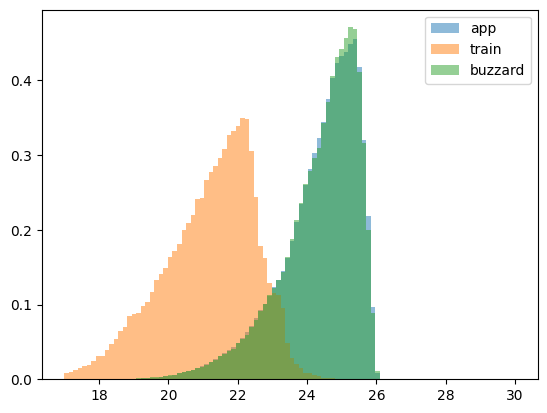

In [6]:
plt.hist(dc2_app['i'], bins=100, alpha=0.5, density=True, range = [17, 30], label='app')
plt.hist(dc2_train['i'], bins=100, alpha=0.5, density=True, range = [17, 30], label='train')
plt.hist(buzzard_data['i'], bins=100, alpha=0.5, density=True, range = [17, 30], label='buzzard')
plt.legend()
plt.show()

In [5]:
iband_mask = (buzzard_data['i'] >= 22)
buzzard_dim = buzzard_data[iband_mask]

In [6]:
gal_inds = buzzard_dim.index.values.tolist()
selected_gals = np.random.choice(gal_inds, 20000, replace=False)
selected_gals

array([815616,  97385, 956398, ...,  32678, 741769, 410087])

In [7]:
#name for redshift augmented training/validation
outfile_train = 'augmentation_paper_plots/catalogs/magshifted_flowed/fzboost_mag_augmented_training_catalog.hdf5'
outfile_val = 'augmentation_paper_plots/catalogs/magshifted_flowed/fzboost_mag_augmented_validation_catalog.hdf5'

### magnitude/redshift augmentation

In [25]:
red_mag_mask = (buzzard_data['specz'] > 1.0) & (buzzard_data['i'] >= 23)
buzzard_dim_highz = buzzard_data[red_mag_mask]

In [26]:
gal_inds = buzzard_dim_highz.index.values.tolist()
selected_gals = np.random.choice(gal_inds, 20000, replace=False)
selected_gals

array([292510, 425136, 363726, ..., 194602, 409432, 715792])

In [27]:
outfile_train = 'augmentation_paper_plots/catalogs/magshifted_flowed/fzboost_mag_redshift_augmented_training_catalog.hdf5'
outfile_val = 'augmentation_paper_plots/catalogs/magshifted_flowed/fzboost_mag_redshift_augmented_validation_catalog.hdf5'

## Color Augmentation

In [5]:
dc2_train = pd.read_csv(f'{path_to_star}/nn_class/extended_sources/tpzrun.tpz_train',delimiter=' ', header=0)
dc2_app = pd.read_csv(f'{path_to_star}/nn_class/extended_sources/tpzrun.tpz_app',delimiter=' ', header=0)

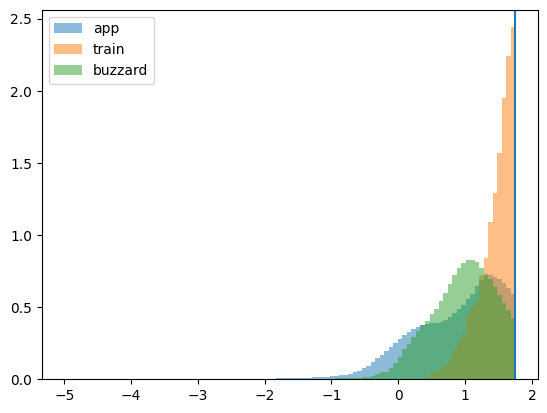

In [6]:
plt.hist(dc2_app['g']-dc2_app['z'], bins=100, alpha=0.5, density=True, range = [-5, 1.75], label='app')
plt.hist(dc2_train['g'] - dc2_train['z'], bins=100, alpha=0.5, density=True, range = [-5, 1.75], label='train')
plt.hist(buzzard_data['g'] - buzzard_data['z'], bins=100, alpha=0.5, density=True, range = [-5, 1.75], label='buzzard')
plt.axvline(x=1.75)
plt.legend()
plt.show()

In [5]:
buzzard_data['gz'] = buzzard_data['g'].to_numpy() - buzzard_data['z'].to_numpy()

color_mask = (buzzard_data['gz'] < 1.75)
buzzard_blue = buzzard_data[color_mask]

In [6]:
gal_inds = buzzard_blue.index.values.tolist()
selected_gals = np.random.choice(gal_inds, 20000, replace=False)
selected_gals

array([217988,  12202, 342470, ..., 876380, 649936, 315686])

In [7]:
outfile_train = 'augmentation_paper_plots/catalogs/magshifted_flowed/fzboost_color_augmented_training_catalog.hdf5'
outfile_val = 'augmentation_paper_plots/catalogs/magshifted_flowed/fzboost_color_augmented_validation_catalog.hdf5'

### Color redshift

In [24]:
buzzard_data['gz'] = buzzard_data['g'].to_numpy() - buzzard_data['z'].to_numpy()

red_col_mask = (buzzard_data['gz'] < 1.75) & (buzzard_data['specz'] > 1.0)
buzzard_blue_highz = buzzard_data[red_col_mask]

In [25]:
gal_inds = buzzard_blue_highz.index.values.tolist()
selected_gals = np.random.choice(gal_inds, 20000, replace=False)
selected_gals

array([164233, 867648, 393970, ..., 888597, 299632, 195346])

In [26]:
outfile_train = 'augmentation_paper_plots/catalogs/magshifted_flowed/fzboost_color_redshift_augmented_training_catalog.hdf5'
outfile_val = 'augmentation_paper_plots/catalogs/magshifted_flowed/fzboost_color_redshift_augmented_validation_catalog.hdf5'

## Color Magnitude Augmentation

### Plot DC2 training sample

In [8]:
dc2_train = pd.read_csv(f'{path_to_star}/nn_class/extended_sources/tpzrun.tpz_train',delimiter=' ', header=0)
dc2_train

,#,specz,extended,type,size,u,g,r,i,z,...,ey,eug,egr,eri,eiz,ezy,eugr,egri,eriz,eizy
0,NaN,0.235581,1.0,1.0,2.61075,22.82677,22.00031,21.04103,20.76294,20.53816,...,0.036768,0.094884,0.026612,0.018956,0.036363,0.049544,0.104153,0.036704,0.046050,0.077345
1,NaN,0.602237,1.0,1.0,2.52077,23.90698,23.33161,22.46412,21.54810,21.30373,...,0.058687,0.194697,0.099138,0.032214,0.036856,0.066997,0.256796,0.110965,0.054994,0.089082
2,NaN,0.475063,1.0,1.0,2.85810,26.28094,23.94031,22.22278,21.47612,21.06906,...,0.067376,1.761220,0.213983,0.034102,0.038048,0.075150,1.799340,0.220450,0.057359,0.096495
3,NaN,0.319348,1.0,1.0,2.13664,23.64069,22.88567,22.24670,21.97749,21.79676,...,0.076350,0.104065,0.056989,0.022918,0.043576,0.086095,0.141964,0.064745,0.055277,0.111703
4,NaN,0.781730,1.0,1.0,1.66325,24.99722,24.46577,23.45113,22.28488,22.00667,...,0.063966,0.247442,0.105024,0.038646,0.045115,0.075898,0.303420,0.121562,0.065283,0.105515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186832,NaN,0.388971,1.0,1.0,3.55268,24.35662,23.57841,22.42320,22.01581,21.74644,...,0.045021,0.168660,0.031470,0.019177,0.030434,0.052238,0.176438,0.040559,0.041745,0.071126
186833,NaN,0.388436,1.0,1.0,2.69087,23.96068,21.76012,20.19668,19.56550,19.19026,...,0.003272,0.086321,0.004509,0.001855,0.002383,0.003838,0.086653,0.005230,0.003524,0.005335
186834,NaN,0.557561,1.0,1.0,3.25113,23.27015,22.42780,21.32660,20.58475,20.28649,...,0.006837,0.036701,0.006538,0.003576,0.004770,0.007992,0.038221,0.008357,0.006841,0.010995
186835,NaN,0.556929,1.0,1.0,2.87710,29.16679,24.49421,23.04427,22.14533,21.56963,...,0.027383,10.568300,0.041839,0.016272,0.019257,0.031937,10.568600,0.048409,0.028931,0.043943


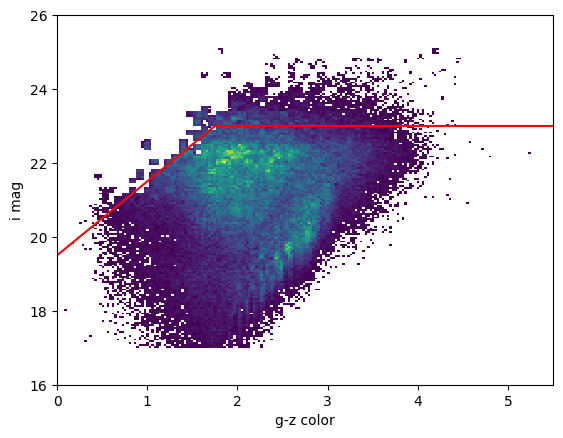

In [9]:
#%matplotlib widget
import matplotlib.pyplot as plt
dc2_i = dc2_train['i'].to_numpy()
dc2_gz = dc2_train['g'].to_numpy() - dc2_train['z'].to_numpy()

x = [0, 1.5, 1.75]
y = [19.5, 22.5, 23]

plt.hist2d(dc2_gz, dc2_i, bins=200, cmin=1, range=[[0,5.5], [16, 26]])
plt.hlines(y=23, xmin=1.75, xmax=5.5, color='r')
plt.plot(x, y, 'r')
plt.xlabel('g-z color')
plt.ylabel('i mag')
#plt.savefig('color_magnitude_augmentation_cuts.png', facecolor='white')
plt.show()

If $g-z < 1.75$, want to choose $i>2\times(g-z)+19.5$. If $g-z > 1.75$, choose $i>23$.

### split buzzard into two based on color

In [10]:
buzzard_data['gz'] = buzzard_data['g'].to_numpy() - buzzard_data['z'].to_numpy()

red_mask = (buzzard_data['gz'] >= 1.75)
blue_mask = (buzzard_data['gz'] < 1.75)

buzzard_red = buzzard_data[red_mask]
buzzard_blue = buzzard_data[blue_mask]

/var/folders/hf/gr6v9hmx20l3zz5m4vjln52r0000gn/T/ipykernel_60396/3864806421.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  buzzard_data['gz'] = buzzard_data['g'].to_numpy() - buzzard_data['z'].to_numpy()


### select red buzzard galaxies

In [11]:
red_mag_mask = (buzzard_red['i'] > 23)
buzzard_red_selection = buzzard_red[red_mag_mask]

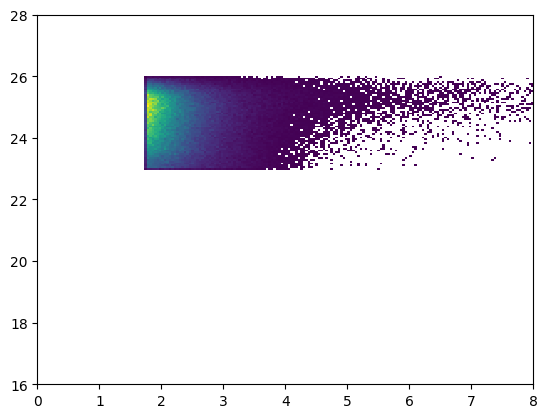

In [12]:
red_i = buzzard_red_selection['i'].to_numpy()
red_gz = buzzard_red_selection['gz'].to_numpy()

plt.hist2d(red_gz, red_i, bins=200, cmin=1, range=[[0,8],[16,28]])
plt.show()

### select blue buzzard galaxies

In [13]:
blue_mag_mask = (buzzard_blue['i'] > 2*buzzard_blue['gz']+19.5)
buzzard_blue_selection = buzzard_blue[blue_mag_mask]

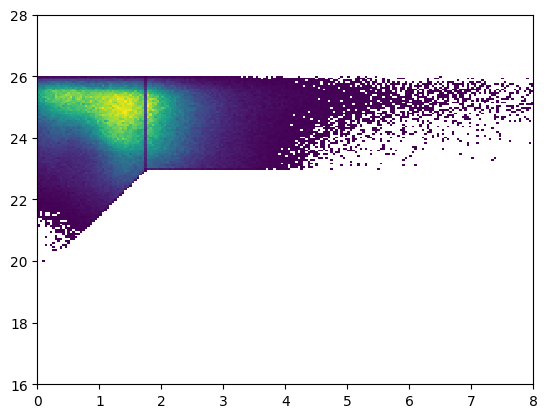

In [14]:
blue_i = buzzard_blue_selection['i'].to_numpy()
blue_gz = buzzard_blue_selection['gz'].to_numpy()

plt.hist2d(blue_gz, blue_i, bins=200, cmin=1, range=[[0,8],[16,28]])
plt.hist2d(red_gz, red_i, bins=200, cmin=1, range=[[0,8],[16,28]])
plt.show()

### combine red and blue selections

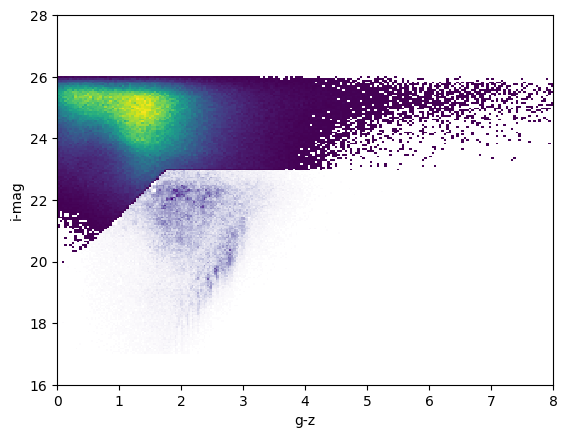

In [15]:
buzzard_blue_dim = pd.concat([buzzard_red_selection, buzzard_blue_selection], ignore_index=False)

mag_selection = buzzard_blue_dim['i'].to_numpy()
col_selection = buzzard_blue_dim['gz'].to_numpy()
plt.hist2d(dc2_gz, dc2_i, bins=200, cmap='Purples', cmin=1, range=[[0,5.5], [16, 26]])
plt.hist2d(col_selection, mag_selection, bins=200, cmap='viridis', cmin=1, range=[[0,8],[16,28]])

plt.xlabel('g-z')
plt.ylabel('i-mag')
#plt.savefig('color_shifting_plots/color_mag_augmented_training_with_ugcut.png', facecolor='white')
plt.show()                                  

In [35]:
gal_inds = buzzard_blue_dim.index.values.tolist()
selected_gals = np.random.choice(gal_inds, 20000, replace=False)
selected_gals

array([916509,  15832, 114830, ..., 106608, 302577, 116580])

In [14]:
outfile_train = 'augmentation_paper_plots/catalogs/magshifted_flowed/fzboost_color_mag_augmented_training_catalog.hdf5'
outfile_val = 'augmentation_paper_plots/catalogs/magshifted_flowed/fzboost_color_mag_augmented_validation_catalog.hdf5'

### color/magnitude/redshift augmentation

In [17]:
redshift_mask = (buzzard_blue_dim['specz'] > 1.0)
buzzard_blue_dim_highz = buzzard_blue_dim[redshift_mask]

In [18]:
gal_inds = buzzard_blue_dim_highz.index.values.tolist()
selected_gals = np.random.choice(gal_inds, 20000, replace=False)
selected_gals

outfile_train = 'augmentation_paper_plots/catalogs/magshifted_flowed/fzboost_color_mag_redshift_upper_limit_augmented_training_catalog.hdf5'
outfile_val = 'augmentation_paper_plots/catalogs/magshifted_flowed/fzboost_color_mag_redshift_upper_limit_augmented_validation_catalog.hdf5'

### color+magnitude or redshift augmentation

In [15]:
redshift_mask = (buzzard_data['specz'] > 1.0)
buzzard_highz = buzzard_data[redshift_mask]

In [16]:
gal_inds_highz = buzzard_highz.index.values.tolist()
selected_gals_highz = np.random.choice(gal_inds_highz, 20000, replace=False)
selected_gals_highz

array([ 1627676,  2910094,  8764737, ...,  3353930,  4308680, 10541826])

In [20]:
union_inds = np.concatenate((gal_inds, gal_inds_highz))
gal_inds = np.unique(union_inds)


In [21]:
selected_gals = np.random.choice(gal_inds, 20000, replace=False)
selected_gals

array([8422404, 6405976, 4146205, ..., 3186896, 2508053,  544780])

In [40]:
outfile_train = 'fzboost_color_mag_or_redshift_augmented_training_catalog.hdf5'
outfile_val = 'fzboost_color_mag_or_redshift_augmented_validation_catalog.hdf5'

# Voxel method for color+mag+redshift

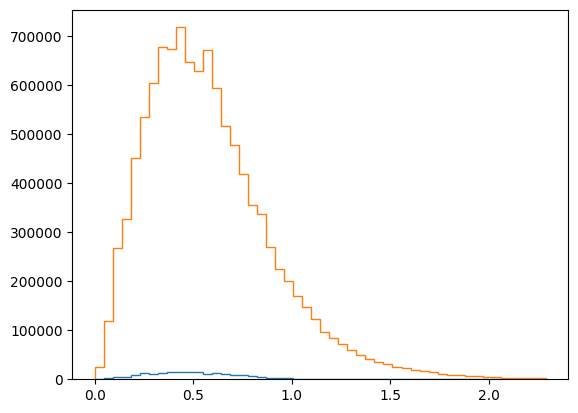

In [8]:
buzzard_redshift = buzzard_data['specz'].to_numpy()
dc2_redshift = dc2_train['specz'].to_numpy()

plt.hist(dc2_redshift, bins=50, range=[0,np.max(buzzard_redshift)], histtype='step')
plt.hist(buzzard_redshift, bins=50, range=[0,np.max(buzzard_redshift)], histtype='step')
plt.show()

In [9]:
redshift_bins = np.linspace(0, np.max(buzzard_redshift), 51)
redshift_bins

array([0.        , 0.04581851, 0.09163702, 0.13745554, 0.18327405,
       0.22909256, 0.27491107, 0.32072958, 0.36654809, 0.41236661,
       0.45818512, 0.50400363, 0.54982214, 0.59564065, 0.64145917,
       0.68727768, 0.73309619, 0.7789147 , 0.82473321, 0.87055172,
       0.91637024, 0.96218875, 1.00800726, 1.05382577, 1.09964428,
       1.1454628 , 1.19128131, 1.23709982, 1.28291833, 1.32873684,
       1.37455535, 1.42037387, 1.46619238, 1.51201089, 1.5578294 ,
       1.60364791, 1.64946643, 1.69528494, 1.74110345, 1.78692196,
       1.83274047, 1.87855898, 1.9243775 , 1.97019601, 2.01601452,
       2.06183303, 2.10765154, 2.15347006, 2.19928857, 2.24510708,
       2.29092559])

In [10]:
dc2_z_bins = np.searchsorted(redshift_bins, dc2_redshift)
dc2_z_bins = dc2_z_bins

In [11]:
dc2_train['z_bin'] = dc2_z_bins

In [12]:
dc2_train['gz'] = dc2_gz

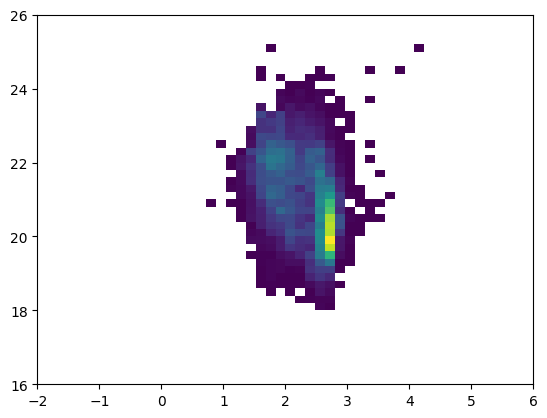

In [13]:
dc2_z_bin_10 = dc2_train[dc2_train['z_bin'] == 10]
dc2_z_bin_10_i = dc2_z_bin_10['i'].to_numpy()
dc2_z_bin_10_gz = dc2_z_bin_10['gz'].to_numpy()

counts, x_edges, y_edges, _ = plt.hist2d(dc2_z_bin_10_gz, dc2_z_bin_10_i, bins=50, cmin=1, range=[[-2,6],[16,26]])
plt.show()

In [14]:
gz_bins = x_edges
i_bins = y_edges

In [15]:
dc2_gz_bins = np.searchsorted(gz_bins, dc2_gz)
dc2_i_bins = np.searchsorted(i_bins, dc2_i)

In [16]:
dc2_train['gz_bin'] = dc2_gz_bins
dc2_train['i_bin'] = dc2_i_bins

In [17]:
buzzard_i = buzzard_data['i'].to_numpy()
buzzard_gz = buzzard_data['g'].to_numpy() - buzzard_data['z'].to_numpy()

buzzard_z_bins = np.searchsorted(redshift_bins, buzzard_redshift)
buzzard_gz_bins = np.searchsorted(gz_bins, buzzard_gz)
buzzard_i_bins = np.searchsorted(i_bins, buzzard_i)

In [18]:
total_bin_dc2 = []
for i in range(len(dc2_z_bins)):
    bin_value = f'{dc2_z_bins[i]}'+f'{dc2_gz_bins[i]}'+f'{dc2_i_bins[i]}'
    bin_value = int(bin_value)
    total_bin_dc2.append(bin_value)
total_bin_dc2 = np.array(total_bin_dc2)

total_bin_dc2
dc2_train['total_bin'] = total_bin_dc2

In [19]:
total_bin_buzzard = []
for i in range(len(buzzard_z_bins)):
    bin_value = f'{buzzard_z_bins[i]}'+f'{buzzard_gz_bins[i]}'+f'{buzzard_i_bins[i]}'
    bin_value = int(bin_value)
    total_bin_buzzard.append(bin_value)
total_bin_buzzard = np.array(total_bin_buzzard)

buzzard_data['total_bin'] = total_bin_buzzard

In [20]:
len(np.unique(total_bin_dc2))

6426

In [21]:
well_populated_dc2 = []
for i in range(len(total_bin_dc2)):
    if np.count_nonzero(total_bin_dc2 == total_bin_dc2[i]) > 0.000001*len(total_bin_dc2):
        well_populated_dc2.append(total_bin_dc2[i])
well_populated_dc2 = np.array(well_populated_dc2)
len(well_populated_dc2)

186837

In [22]:
buzzard_to_use = np.isin(total_bin_buzzard, well_populated_dc2)
buzzard_data['dc2_covered'] = buzzard_to_use

In [23]:
buzzard_not_covered = buzzard_data[buzzard_data['dc2_covered'] == False]

In [24]:
gal_inds = buzzard_not_covered.index.values.tolist()
selected_gals = np.random.choice(gal_inds, 20000, replace=False)
selected_gals

outfile_train = 'fzboost_color_mag_redshift_voxel_selected_0.0001thresh_augmented_training_catalog.hdf5'
outfile_val = 'fzboost_color_mag_redshift_voxel_selected_0.0001thresh_augmented_validation_catalog.hdf5'

# Format Buzzard Galaxies and Combine with DC2

The above section selected indices of buzzard galaxies based on augmentation choice. Now we format the buzzard columns to match the dc2 columns and merge with the dc2 training sample

### Split into training and validation

In [36]:
train_gals = selected_gals[0:10000]
val_gals = selected_gals[10000:]

In [37]:
buzzard_train_gals = buzzard_data.loc[np.sort(train_gals)]
buzzard_train_gals

,eg,egr,ei,eiz,er,eri,eu,eug,ey,ez,...,iz,r,ri,specz,u,ug,y,z,zy,gz
10,0.045482,0.061160,0.042299,0.108416,0.040889,0.058831,0.139595,0.146818,0.082912,0.099824,...,-0.167333,25.491270,0.384251,0.506004,25.615643,-0.015070,24.221674,25.274353,1.052680,0.356359
66,0.051607,0.065119,0.026462,0.073544,0.039715,0.047723,0.141873,0.150968,0.105654,0.068619,...,-0.554258,25.466339,0.878502,0.893843,26.035913,0.269741,24.685518,25.142096,0.456577,0.624077
181,0.113251,0.129606,0.051651,0.082563,0.063023,0.081484,0.195395,0.225843,0.243487,0.064411,...,0.281249,25.960560,0.681435,0.506921,26.800825,0.166014,25.589128,24.997875,-0.591253,1.636936
272,0.033374,0.039704,0.019577,0.033408,0.021509,0.029084,0.101355,0.106708,0.101004,0.027071,...,0.262860,24.777203,0.532127,0.521745,25.172632,-0.109662,24.491331,23.982216,-0.509115,1.300077
315,0.079453,0.092488,0.061033,0.080671,0.047341,0.077241,0.195225,0.210774,0.106545,0.052752,...,0.797437,25.613474,0.082194,0.322998,26.312267,0.240492,24.790398,24.733843,-0.056556,1.337933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999396,0.051314,0.074049,0.063371,0.286715,0.053386,0.082862,0.172068,0.179556,0.146642,0.279623,...,-0.706320,25.766037,0.200506,0.398056,25.945066,0.157230,24.792955,26.271851,1.478895,-0.484015
999539,0.024015,0.033848,0.028743,0.089121,0.023852,0.037351,0.074997,0.078748,0.071351,0.084359,...,-0.722266,24.909805,0.221713,0.578417,24.882591,-0.013865,24.053555,25.410358,1.356803,-0.513903
999599,0.026625,0.036127,0.033772,0.062731,0.024419,0.041676,0.064573,0.069847,0.070813,0.052864,...,0.030689,24.952209,0.152694,0.400284,24.735470,-0.280202,24.090839,24.768827,0.677988,0.246843
999737,0.023513,0.026798,0.014584,0.026918,0.012856,0.019442,0.237109,0.238272,0.037720,0.022624,...,0.125292,24.140980,0.282730,0.344281,25.855825,1.015875,23.490154,23.732958,0.242803,1.106993


In [38]:
buzzard_val_gals = buzzard_data.loc[np.sort(val_gals)]
buzzard_val_gals

,eg,egr,ei,eiz,er,eri,eu,eug,ey,ez,...,iz,r,ri,specz,u,ug,y,z,zy,gz
35,0.048679,0.067622,0.054146,0.070660,0.046938,0.071659,0.192697,0.198751,0.127492,0.045398,...,0.793474,25.606041,0.289584,1.076919,25.872591,0.107198,24.690569,24.522984,-0.167586,1.242409
243,0.031438,0.043735,0.032251,0.049619,0.030404,0.044323,0.101835,0.106577,0.054254,0.037709,...,0.513594,25.157475,0.359007,2.102872,25.361549,0.148088,23.923904,24.284874,0.360969,0.928587
452,0.099814,0.103944,0.025059,0.034381,0.029009,0.038334,0.358265,0.371909,0.132407,0.023540,...,0.691152,25.105568,0.600220,0.684410,26.531803,-0.031044,24.806538,23.814198,-0.992339,2.748650
475,0.024991,0.036556,0.034237,0.072955,0.026679,0.043405,0.125318,0.127786,0.112900,0.064422,...,-0.001370,24.989618,0.087920,0.132930,25.543377,0.584562,24.722364,24.903069,0.180704,0.055746
603,0.059616,0.094411,0.053269,0.123245,0.073208,0.090537,0.253531,0.260446,0.118272,0.111138,...,-0.193831,26.169445,0.861965,0.860241,26.040085,0.105861,24.827539,25.501312,0.673773,0.432911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999209,0.293938,0.296627,0.025179,0.039735,0.039850,0.047138,0.141791,0.326350,0.106449,0.030739,...,0.373360,25.418774,0.917414,1.305846,25.711756,-1.875974,24.487705,24.128000,-0.359705,3.459730
999362,0.009682,0.012722,0.010264,0.015282,0.008252,0.013170,0.022629,0.024613,0.015921,0.011323,...,0.496706,23.487022,0.101135,0.245617,23.560902,-0.151827,22.388130,22.889181,0.501050,0.823547
999400,0.033519,0.057606,0.051592,0.197032,0.046850,0.069690,0.142157,0.146055,0.141089,0.190158,...,-0.672365,25.619410,0.279469,0.511306,25.556885,0.315850,24.839590,26.012306,1.172716,-0.771271
999475,0.055938,0.063410,0.037301,0.051303,0.029864,0.047783,0.143171,0.153711,0.065575,0.035222,...,0.651017,25.200226,0.254942,0.925592,25.932875,0.084838,24.095652,24.294266,0.198614,1.553772


## Format data and calculate colors

In [32]:
buzzard_train_gals.replace(np.inf, 99, inplace=True)
buzzard_val_gals.replace(np.inf, 99, inplace=True)

In [13]:
bands = ['u', 'g', 'r', 'i', 'z', 'y']
rename_dict = {}

for band in bands:
    rename_dict[f'{band}_mag'] = band
    rename_dict[f'{band}_mag_err'] = 'e'+band
    
#rename_dict['redshift_true'] = 'specz'
#rename_dict['mcal_T'] = 'size'

In [19]:
buzzard_train_gals = buzzard_train_gals.rename(columns=rename_dict)
buzzard_val_gals = buzzard_val_gals.rename(columns=rename_dict)

### calculate colors and errors

In [20]:
for i in range(len(bands)-1):
    band1 = buzzard_train_gals[f'{bands[i]}'].to_numpy()
    band2 = buzzard_train_gals[f'{bands[i+1]}'].to_numpy()
    color = band1-band2
    buzzard_train_gals[f'{bands[i]}{bands[i+1]}'] = color
    
    err1 = buzzard_train_gals[f'e{bands[i]}'].to_numpy()
    err2 = buzzard_train_gals[f'e{bands[i+1]}'].to_numpy()
    color_err = np.sqrt((err1**2)+(err2**2))
    buzzard_train_gals[f'e{bands[i]}{bands[i+1]}'] = color_err
    
buzzard_train_gals

,dec,g,eg,i,ei,size,mcal_s2n,r,er,ra,...,ug,eug,gr,egr,ri,eri,iz,eiz,zy,ezy
417,5.938726,22.747100,0.005681,21.546444,0.003934,0.921527,407.009266,22.080128,0.004586,51.242207,...,0.315618,0.018895,0.666972,0.007301,0.533684,0.006042,0.132786,0.007123,0.161875,0.012885
893,15.587331,24.989134,0.044795,24.413250,0.055145,0.950155,31.858478,24.638923,0.048415,44.524824,...,0.826928,0.231941,0.350211,0.065959,0.225673,0.073382,-0.036964,0.111878,0.046095,0.230125
1528,14.335176,24.178263,0.021227,23.528819,0.024419,3.400148,72.079066,23.771711,0.021782,42.635166,...,0.971004,0.124958,0.406553,0.030414,0.242892,0.032722,0.042091,0.046932,0.033090,0.095686
1592,14.146704,25.701231,0.086312,24.529862,0.061398,0.788260,29.162636,24.767644,0.054509,39.657785,...,4.298769,0.437869,0.933587,0.102083,0.237782,0.082103,0.147616,0.110137,0.202281,0.192701
1940,3.399406,25.061353,0.047876,24.243486,0.047163,0.348012,36.849263,24.737770,0.053029,44.299055,...,0.363359,0.165766,0.323584,0.071444,0.494284,0.070968,0.438995,0.071474,0.574756,0.088782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10809980,9.771076,24.199340,0.021643,23.064838,0.015927,1.798544,111.107911,23.356287,0.014857,36.020849,...,0.917282,0.121438,0.843053,0.026251,0.291448,0.021781,0.211601,0.027454,0.080578,0.051513
10810735,10.000518,24.500559,0.028563,23.734317,0.029508,0.353480,57.439092,24.021091,0.027406,39.286494,...,1.004204,0.173216,0.479468,0.039584,0.286773,0.040271,-0.115634,0.063300,0.049608,0.132040
10814826,7.774848,26.669167,0.210496,25.777952,0.193815,0.547047,10.003963,25.902220,0.154988,50.059249,...,3.330833,1.221663,0.766947,0.261400,0.124268,0.248164,0.325158,0.312468,-4.547207,0.696962
10815789,8.120262,25.841884,0.098250,24.632998,0.067516,0.174573,24.565728,25.053559,0.070930,49.154997,...,4.158116,0.449164,0.788325,0.121178,0.420561,0.097926,0.118755,0.123370,0.110299,0.232658


In [21]:
for i in range(len(bands)-1):
    band1 = buzzard_val_gals[f'{bands[i]}'].to_numpy()
    band2 = buzzard_val_gals[f'{bands[i+1]}'].to_numpy()
    color = band1-band2
    buzzard_val_gals[f'{bands[i]}{bands[i+1]}'] = color
    
    err1 = buzzard_val_gals[f'e{bands[i]}'].to_numpy()
    err2 = buzzard_val_gals[f'e{bands[i+1]}'].to_numpy()
    color_err = np.sqrt((err1**2)+(err2**2))
    buzzard_val_gals[f'e{bands[i]}{bands[i+1]}'] = color_err
    
buzzard_val_gals

,dec,g,eg,i,ei,size,mcal_s2n,r,er,ra,...,ug,eug,gr,egr,ri,eri,iz,eiz,zy,ezy
267,7.066213,22.891505,0.006489,22.323787,0.008049,14.504976,221.760435,22.549462,0.007066,46.891308,...,0.774682,0.032081,0.342043,0.009594,0.225675,0.010710,0.089536,0.014989,0.062838,0.029519
998,6.632637,26.770249,0.231035,25.412012,0.138360,0.144034,11.283480,26.052222,0.177950,43.797773,...,3.229751,0.994522,0.718027,0.291622,0.640211,0.225410,0.162044,0.245942,-4.750032,0.440462
3452,1.517080,26.561148,0.190562,25.595784,0.163878,1.604671,11.150540,25.823935,0.144206,43.411585,...,3.438852,0.907741,0.737213,0.238975,0.228151,0.218292,0.246678,0.276557,-4.650894,0.538971
3860,5.328790,26.274183,0.146302,25.502156,0.150338,0.380318,11.523842,25.770631,0.137297,49.133116,...,3.725817,0.729131,0.503552,0.200636,0.268475,0.203598,0.005697,0.296151,-4.503541,0.589543
5763,14.139872,24.759437,0.036254,23.365248,0.021004,0.173608,82.876082,23.687233,0.020151,47.727465,...,1.019679,0.222928,1.072204,0.041478,0.321986,0.029108,0.186179,0.036777,0.248662,0.061571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10812217,11.451170,25.097569,0.049500,23.527079,0.024380,0.335047,67.526330,24.000270,0.026885,47.360294,...,0.870654,0.266449,1.097299,0.056330,0.473191,0.036294,0.178028,0.042905,0.210467,0.073973
10813122,1.678432,26.798262,0.237073,25.527683,0.153915,0.312597,10.999507,25.907797,0.155786,46.403496,...,3.201738,1.294297,0.890465,0.283677,0.380114,0.218995,0.152888,0.275177,-4.625205,0.478402
10816127,12.196608,25.538437,0.074294,25.117888,0.105527,0.706355,17.113161,25.282369,0.087570,52.134795,...,4.461563,0.284236,0.256068,0.114839,0.164481,0.137129,-0.048140,0.215770,-4.833973,0.460342
10817585,11.800372,24.122234,0.020159,23.210484,0.018214,0.185425,100.738734,23.404277,0.015528,45.750496,...,0.651327,0.089423,0.717957,0.025446,0.193793,0.023935,0.181692,0.031980,0.062888,0.061361


### Format final columns to keep

In [39]:
headers = ['specz']#, 'size']

bands = ['u', 'g', 'r', 'i', 'z', 'y']
colors = ['ug', 'gr', 'ri', 'iz', 'zy']

for band in bands:
    headers.append(band)
for color in colors:
    headers.append(color)
for band in bands:
    headers.append('e'+band)
for color in colors:
    headers.append('e'+color)
    
buzzard_train_gals = buzzard_train_gals[headers]
buzzard_val_gals = buzzard_val_gals[headers]

In [40]:
mastermask = np.zeros(10000, dtype=bool)
buzzard_train_gals['dc2'] = mastermask
buzzard_val_gals['dc2'] = mastermask

## Read in DC2 data

In [41]:
dc2_train_gals = pd.read_csv(f'{path_to_star}/nn_class/extended_sources/tpzrun.tpz_train',delimiter=' ', header=0)
dc2_val_gals = pd.read_csv(f'{path_to_star}/nn_class/extended_sources/tpzrun.tpz_test',delimiter=' ', header=0)

In [42]:
dc2_train_gals = dc2_train_gals[headers]
dc2_val_gals = dc2_val_gals[headers]
dc2_train_gals

,specz,u,g,r,i,z,y,ug,gr,ri,...,eg,er,ei,ez,ey,eug,egr,eri,eiz,ezy
0,0.235581,22.82677,22.00031,21.04103,20.76294,20.53816,20.34065,0.826462,0.959285,0.278087,...,0.023841,0.011825,0.014816,0.033208,0.036768,0.094884,0.026612,0.018956,0.036363,0.049544
1,0.602237,23.90698,23.33161,22.46412,21.54810,21.30373,20.94386,0.575367,0.867492,0.916014,...,0.095418,0.026901,0.017722,0.032316,0.058687,0.194697,0.099138,0.032214,0.036856,0.066997
2,0.475063,26.28094,23.94031,22.22278,21.47612,21.06906,20.89683,2.340630,1.717520,0.746666,...,0.212051,0.028693,0.018430,0.033287,0.067376,1.761220,0.213983,0.034102,0.038048,0.075150
3,0.319348,23.64069,22.88567,22.24670,21.97749,21.79676,21.71843,0.755024,0.638973,0.269201,...,0.055121,0.014474,0.017769,0.039789,0.076350,0.104065,0.056989,0.022918,0.043576,0.086095
4,0.781730,24.99722,24.46577,23.45113,22.28488,22.00667,22.04720,0.531451,1.014640,1.166250,...,0.099514,0.033570,0.019145,0.040851,0.063966,0.247442,0.105024,0.038646,0.045115,0.075898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186832,0.388971,24.35662,23.57841,22.42320,22.01581,21.74644,21.52543,0.778212,1.155210,0.407391,...,0.029102,0.011977,0.014977,0.026494,0.045021,0.168660,0.031470,0.019177,0.030434,0.052238
186833,0.388436,23.96068,21.76012,20.19668,19.56550,19.19026,18.99487,2.200560,1.563440,0.631180,...,0.004306,0.001339,0.001284,0.002007,0.003272,0.086321,0.004509,0.001855,0.002383,0.003838
186834,0.557561,23.27015,22.42780,21.32660,20.58475,20.28649,20.07480,0.842355,1.101200,0.741841,...,0.005966,0.002675,0.002373,0.004138,0.006837,0.036701,0.006538,0.003576,0.004770,0.007992
186835,0.556929,29.16679,24.49421,23.04427,22.14533,21.56963,21.63984,4.672580,1.449940,0.898945,...,0.039830,0.012809,0.010035,0.016435,0.027383,10.568300,0.041839,0.016272,0.019257,0.031937


In [43]:
mastermask = np.ones(len(dc2_train_gals), dtype=bool)
dc2_train_gals['dc2'] = mastermask
dc2_train_gals

,specz,u,g,r,i,z,y,ug,gr,ri,...,er,ei,ez,ey,eug,egr,eri,eiz,ezy,dc2
0,0.235581,22.82677,22.00031,21.04103,20.76294,20.53816,20.34065,0.826462,0.959285,0.278087,...,0.011825,0.014816,0.033208,0.036768,0.094884,0.026612,0.018956,0.036363,0.049544,True
1,0.602237,23.90698,23.33161,22.46412,21.54810,21.30373,20.94386,0.575367,0.867492,0.916014,...,0.026901,0.017722,0.032316,0.058687,0.194697,0.099138,0.032214,0.036856,0.066997,True
2,0.475063,26.28094,23.94031,22.22278,21.47612,21.06906,20.89683,2.340630,1.717520,0.746666,...,0.028693,0.018430,0.033287,0.067376,1.761220,0.213983,0.034102,0.038048,0.075150,True
3,0.319348,23.64069,22.88567,22.24670,21.97749,21.79676,21.71843,0.755024,0.638973,0.269201,...,0.014474,0.017769,0.039789,0.076350,0.104065,0.056989,0.022918,0.043576,0.086095,True
4,0.781730,24.99722,24.46577,23.45113,22.28488,22.00667,22.04720,0.531451,1.014640,1.166250,...,0.033570,0.019145,0.040851,0.063966,0.247442,0.105024,0.038646,0.045115,0.075898,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186832,0.388971,24.35662,23.57841,22.42320,22.01581,21.74644,21.52543,0.778212,1.155210,0.407391,...,0.011977,0.014977,0.026494,0.045021,0.168660,0.031470,0.019177,0.030434,0.052238,True
186833,0.388436,23.96068,21.76012,20.19668,19.56550,19.19026,18.99487,2.200560,1.563440,0.631180,...,0.001339,0.001284,0.002007,0.003272,0.086321,0.004509,0.001855,0.002383,0.003838,True
186834,0.557561,23.27015,22.42780,21.32660,20.58475,20.28649,20.07480,0.842355,1.101200,0.741841,...,0.002675,0.002373,0.004138,0.006837,0.036701,0.006538,0.003576,0.004770,0.007992,True
186835,0.556929,29.16679,24.49421,23.04427,22.14533,21.56963,21.63984,4.672580,1.449940,0.898945,...,0.012809,0.010035,0.016435,0.027383,10.568300,0.041839,0.016272,0.019257,0.031937,True


In [44]:
mastermask = np.ones(len(dc2_val_gals), dtype=bool)
dc2_val_gals['dc2'] = mastermask
dc2_val_gals

,specz,u,g,r,i,z,y,ug,gr,ri,...,er,ei,ez,ey,eug,egr,eri,eiz,ezy,dc2
0,0.486185,24.03885,23.55350,22.64954,22.16332,21.93716,21.71210,0.485351,0.903955,0.486221,...,0.025665,0.018088,0.044722,0.089865,0.212380,0.059341,0.031398,0.048242,0.100378,True
1,0.319816,23.77799,23.15979,22.31581,22.00174,21.69715,21.61143,0.618206,0.843976,0.314071,...,0.016958,0.017963,0.035711,0.085683,0.127498,0.070858,0.024703,0.039974,0.092827,True
2,0.659287,24.04830,23.67303,22.70086,21.93454,21.65234,21.51487,0.375272,0.972169,0.766324,...,0.030746,0.020634,0.042374,0.086148,0.217605,0.119337,0.037028,0.047131,0.096005,True
3,0.527738,23.33308,22.62159,21.61079,20.97170,20.81313,20.50724,0.711492,1.010800,0.639095,...,0.009602,0.008184,0.020543,0.033798,0.124912,0.046025,0.012616,0.022113,0.039551,True
4,0.790492,24.73999,23.84389,23.06959,21.96165,21.56767,21.55601,0.896105,0.774295,1.107950,...,0.037926,0.018381,0.034497,0.058033,0.437310,0.124640,0.042146,0.039088,0.067512,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186832,0.367243,23.67338,22.98893,22.14775,21.83491,21.75180,21.50539,0.684448,0.841181,0.312839,...,0.004284,0.005949,0.011545,0.022074,0.043067,0.009674,0.007331,0.012987,0.024911,True
186833,0.547520,27.52687,24.53054,22.82630,21.81810,21.51149,21.50714,2.996330,1.704240,1.008200,...,0.010888,0.008134,0.013362,0.026281,1.503330,0.036305,0.013591,0.015643,0.029482,True
186834,0.516607,25.44070,24.81679,23.56261,23.12990,22.99002,22.91723,0.623913,1.254180,0.432706,...,0.016696,0.019158,0.040723,0.094335,0.249566,0.046236,0.025412,0.045005,0.102749,True
186835,0.837257,25.69234,24.48131,22.78986,21.64264,20.87676,20.60918,1.211030,1.691450,1.147220,...,0.008534,0.005386,0.006196,0.010365,0.411596,0.034256,0.010091,0.008210,0.012076,True


### Combine buzzard and dc2 datasets

In [45]:
training_data = pd.concat([dc2_train_gals, buzzard_train_gals], ignore_index=True)
training_data

,specz,u,g,r,i,z,y,ug,gr,ri,...,er,ei,ez,ey,eug,egr,eri,eiz,ezy,dc2
0,0.235581,22.826770,22.000310,21.041030,20.762940,20.538160,20.340650,0.826462,0.959285,0.278087,...,0.011825,0.014816,0.033208,0.036768,0.094884,0.026612,0.018956,0.036363,0.049544,True
1,0.602237,23.906980,23.331610,22.464120,21.548100,21.303730,20.943860,0.575367,0.867492,0.916014,...,0.026901,0.017722,0.032316,0.058687,0.194697,0.099138,0.032214,0.036856,0.066997,True
2,0.475063,26.280940,23.940310,22.222780,21.476120,21.069060,20.896830,2.340630,1.717520,0.746666,...,0.028693,0.018430,0.033287,0.067376,1.761220,0.213983,0.034102,0.038048,0.075150,True
3,0.319348,23.640690,22.885670,22.246700,21.977490,21.796760,21.718430,0.755024,0.638973,0.269201,...,0.014474,0.017769,0.039789,0.076350,0.104065,0.056989,0.022918,0.043576,0.086095,True
4,0.781730,24.997220,24.465770,23.451130,22.284880,22.006670,22.047200,0.531451,1.014640,1.166250,...,0.033570,0.019145,0.040851,0.063966,0.247442,0.105024,0.038646,0.045115,0.075898,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196832,0.398056,25.945066,25.787836,25.766037,25.565531,26.271851,24.792955,0.157230,0.021799,0.200506,...,0.053386,0.063371,0.279623,0.146642,0.179556,0.074049,0.082862,0.286715,0.315742,False
196833,0.578417,24.882591,24.896456,24.909805,24.688091,25.410358,24.053555,-0.013865,-0.013350,0.221713,...,0.023852,0.028743,0.084359,0.071351,0.078748,0.033848,0.037351,0.089121,0.110487,False
196834,0.400284,24.735470,25.015671,24.952209,24.799517,24.768827,24.090839,-0.280202,0.063462,0.152694,...,0.024419,0.033772,0.052864,0.070813,0.069847,0.036127,0.041676,0.062731,0.088369,False
196835,0.344281,25.855825,24.839951,24.140980,23.858250,23.732958,23.490154,1.015875,0.698971,0.282730,...,0.012856,0.014584,0.022624,0.037720,0.238272,0.026798,0.019442,0.026918,0.043985,False


In [46]:
validation_data = pd.concat([dc2_val_gals, buzzard_val_gals], ignore_index=True)
validation_data

,specz,u,g,r,i,z,y,ug,gr,ri,...,er,ei,ez,ey,eug,egr,eri,eiz,ezy,dc2
0,0.486185,24.038850,23.553500,22.649540,22.163320,21.937160,21.712100,0.485351,0.903955,0.486221,...,0.025665,0.018088,0.044722,0.089865,0.212380,0.059341,0.031398,0.048242,0.100378,True
1,0.319816,23.777990,23.159790,22.315810,22.001740,21.697150,21.611430,0.618206,0.843976,0.314071,...,0.016958,0.017963,0.035711,0.085683,0.127498,0.070858,0.024703,0.039974,0.092827,True
2,0.659287,24.048300,23.673030,22.700860,21.934540,21.652340,21.514870,0.375272,0.972169,0.766324,...,0.030746,0.020634,0.042374,0.086148,0.217605,0.119337,0.037028,0.047131,0.096005,True
3,0.527738,23.333080,22.621590,21.610790,20.971700,20.813130,20.507240,0.711492,1.010800,0.639095,...,0.009602,0.008184,0.020543,0.033798,0.124912,0.046025,0.012616,0.022113,0.039551,True
4,0.790492,24.739990,23.843890,23.069590,21.961650,21.567670,21.556010,0.896105,0.774295,1.107950,...,0.037926,0.018381,0.034497,0.058033,0.437310,0.124640,0.042146,0.039088,0.067512,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196832,1.305846,25.711756,27.587730,25.418774,24.501360,24.128000,24.487705,-1.875974,2.168956,0.917414,...,0.039850,0.025179,0.030739,0.106449,0.326350,0.296627,0.047138,0.039735,0.110798,False
196833,0.245617,23.560902,23.712729,23.487022,23.385887,22.889181,22.388130,-0.151827,0.225707,0.101135,...,0.008252,0.010264,0.011323,0.015921,0.024613,0.012722,0.013170,0.015282,0.019536,False
196834,0.511306,25.556885,25.241035,25.619410,25.339941,26.012306,24.839590,0.315850,-0.378374,0.279469,...,0.046850,0.051592,0.190158,0.141089,0.146055,0.057606,0.069690,0.197032,0.236783,False
196835,0.925592,25.932875,25.848038,25.200226,24.945284,24.294266,24.095652,0.084838,0.647812,0.254942,...,0.029864,0.037301,0.035222,0.065575,0.153711,0.063410,0.047783,0.051303,0.074436,False


## Save training and validation files

In [30]:
outf = h5py.File(outfile_train, 'w')
group = outf.create_group('photometry')

In [31]:
keys = list(training_data.columns)
for key in keys:
    group[f'{key}'] = training_data[f'{key}']
outf.close()

In [32]:
outf = h5py.File(outfile_val, 'w')
group = outf.create_group('photometry')

In [33]:
keys = list(validation_data.columns)
for key in keys:
    group[f'{key}'] = validation_data[f'{key}']
outf.close()

### Plot DC2 and Buzzard portions of training sample

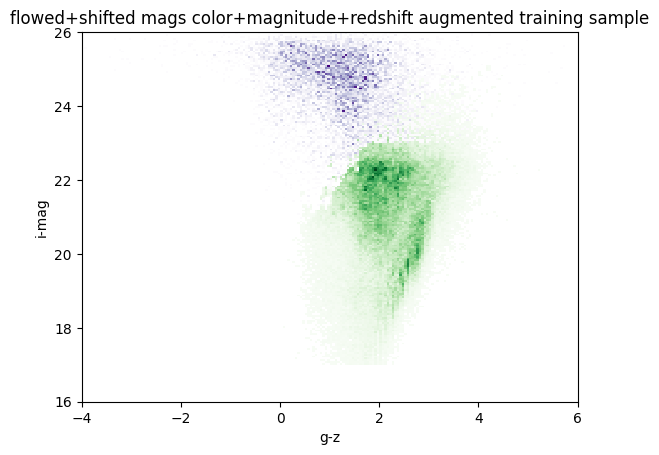

In [47]:
dc2_part = training_data[training_data['dc2'] == True]
buzzard_part = training_data[training_data['dc2'] == False]

dc2_i = dc2_part['i'].to_numpy()
dc2_gz = dc2_part['g'].to_numpy() - dc2_part['z'].to_numpy()

buzzard_i = buzzard_part['i'].to_numpy()
buzzard_gz = buzzard_part['g'].to_numpy() - buzzard_part['z'].to_numpy()

plt.hist2d(dc2_gz, dc2_i, bins=200, cmap='Greens', cmin=1, range=[[-4,6],[16,26]])
plt.hist2d(buzzard_gz, buzzard_i, bins=200, cmap='Purples', cmin=1, range=[[-4,6],[16,26]])
plt.xlabel('g-z')
plt.ylabel('i-mag')
plt.title('flowed+shifted mags color+magnitude+redshift augmented training sample')
#plt.savefig('augmentation_paper_plots/magshifted_flowed_training_samples/color_mag_redshift_augmented_training.png', facecolor='white')
plt.show()